## Import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Read in CSV

In [5]:
df = pd.read_csv('../data/us-counties.csv')

## Examine most recent date

In [6]:
df.tail()

,date,county,state,fips,cases,deaths
35693,2020-04-05,Sublette,Wyoming,56035.0,1,0
35694,2020-04-05,Sweetwater,Wyoming,56037.0,5,0
35695,2020-04-05,Teton,Wyoming,56039.0,39,0
35696,2020-04-05,Uinta,Wyoming,56041.0,2,0
35697,2020-04-05,Washakie,Wyoming,56043.0,4,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35698 entries, 0 to 35697
Data columns (total 6 columns):
date      35698 non-null object
county    35698 non-null object
state     35698 non-null object
fips      35180 non-null float64
cases     35698 non-null int64
deaths    35698 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 1.6+ MB


## Examine entries of each county

In [8]:
df['county'].value_counts()

Washington      474
Unknown         465
Jefferson       352
Franklin        314
Jackson         287
               ... 
Queens            1
Bronx             1
Greenup           1
Republic          1
Presque Isle      1
Name: county, Length: 1512, dtype: int64

## Determine if there are null values in each column

In [9]:
df.isnull().sum()

date        0
county      0
state       0
fips      518
cases       0
deaths      0
dtype: int64

## Drop the fips column with 518 null values

In [10]:
df = df.drop(columns='fips')

In [11]:
df.isnull().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [12]:
df

,date,county,state,cases,deaths
0,2020-01-21,Snohomish,Washington,1,0
1,2020-01-22,Snohomish,Washington,1,0
2,2020-01-23,Snohomish,Washington,1,0
3,2020-01-24,Cook,Illinois,1,0
4,2020-01-24,Snohomish,Washington,1,0
...,...,...,...,...,...
35693,2020-04-05,Sublette,Wyoming,1,0
35694,2020-04-05,Sweetwater,Wyoming,5,0
35695,2020-04-05,Teton,Wyoming,39,0
35696,2020-04-05,Uinta,Wyoming,2,0


## Examine quantity of entries for each state

In [13]:
df['state'].value_counts()

Georgia                     2088
Texas                       1940
California                  1407
Virginia                    1361
Indiana                     1240
North Carolina              1222
Tennessee                   1196
Mississippi                 1192
Florida                     1157
New York                    1145
Ohio                        1123
Michigan                    1032
Pennsylvania                 989
Louisiana                    987
Kentucky                     963
Illinois                     939
Missouri                     912
Colorado                     910
Alabama                      867
Washington                   862
Arkansas                     847
Minnesota                    842
Iowa                         829
Wisconsin                    829
South Carolina               760
Oklahoma                     679
Kansas                       591
Oregon                       522
New Jersey                   521
Maryland                     452
South Dako

## Groupby County and State to Generate Plots

In [14]:
cs = df.groupby(['county', 'state'])

## Select only rows pertaining to Los Angeles County

In [15]:
df_la = df.loc[df['county'] == 'Los Angeles']

In [16]:
df_la

,date,county,state,cases,deaths
9,2020-01-26,Los Angeles,California,1,0
14,2020-01-27,Los Angeles,California,1,0
19,2020-01-28,Los Angeles,California,1,0
24,2020-01-29,Los Angeles,California,1,0
29,2020-01-30,Los Angeles,California,1,0
...,...,...,...,...,...
24121,2020-04-01,Los Angeles,California,3518,65
26359,2020-04-02,Los Angeles,California,4045,78
28654,2020-04-03,Los Angeles,California,4566,89
31014,2020-04-04,Los Angeles,California,5277,117


## Plot cases and deaths for Los Angeles County

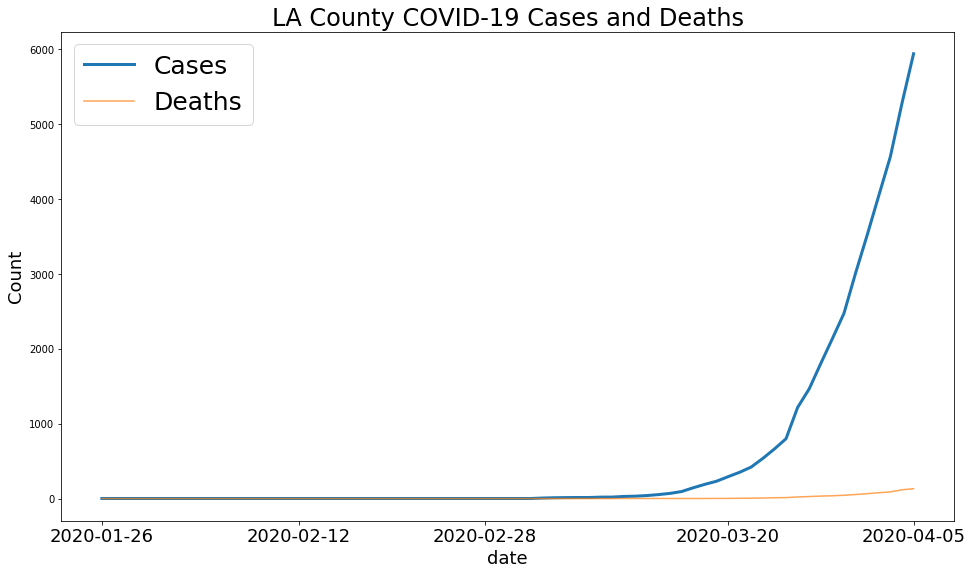

In [29]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

plt.plot(df_la['date'], # X variable
         df_la['cases'], # Y variable
         label = 'Cases',
         lw = 3)

plt.plot(df_la['date'], # X variable
         df_la['deaths'], # Y variable
         label = 'Deaths',
         alpha = 0.7)

plt.title('LA County COVID-19 Cases and Deaths', fontsize = 24)
plt.xlabel('date', fontsize = 18)
plt.xticks(['2020-01-26', '2020-02-12', 
            '2020-02-28', '2020-03-20', '2020-04-05'], fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.legend(fontsize = 25);




## Groupby State

In [18]:
ny = df.groupby(['state'])

## Select all rows pertaining to New York State to Generate a plot

In [19]:
df_ny = df.loc[df['state'] == 'New York']

In [20]:
df_ny

,date,county,state,cases,deaths
416,2020-03-01,New York City,New York,1,0
448,2020-03-02,New York City,New York,1,0
482,2020-03-03,New York City,New York,2,0
518,2020-03-04,New York City,New York,2,0
519,2020-03-04,Westchester,New York,9,0
...,...,...,...,...,...
34733,2020-04-05,Washington,New York,18,1
34734,2020-04-05,Wayne,New York,32,0
34735,2020-04-05,Westchester,New York,13722,197
34736,2020-04-05,Wyoming,New York,22,1


## Group New York rows by date, cases, and deaths

In [30]:
ny_cd = df_ny.groupby('date')[['cases', 'deaths']].max()

In [31]:
ny_cd

,cases,deaths
date,,
2020-03-01,1,0
2020-03-02,1,0
2020-03-03,2,0
2020-03-04,9,0
2020-03-05,17,0
2020-03-06,33,0
2020-03-07,69,0
2020-03-08,81,0
2020-03-09,97,0


## Generate plot of cases and deaths in New York State

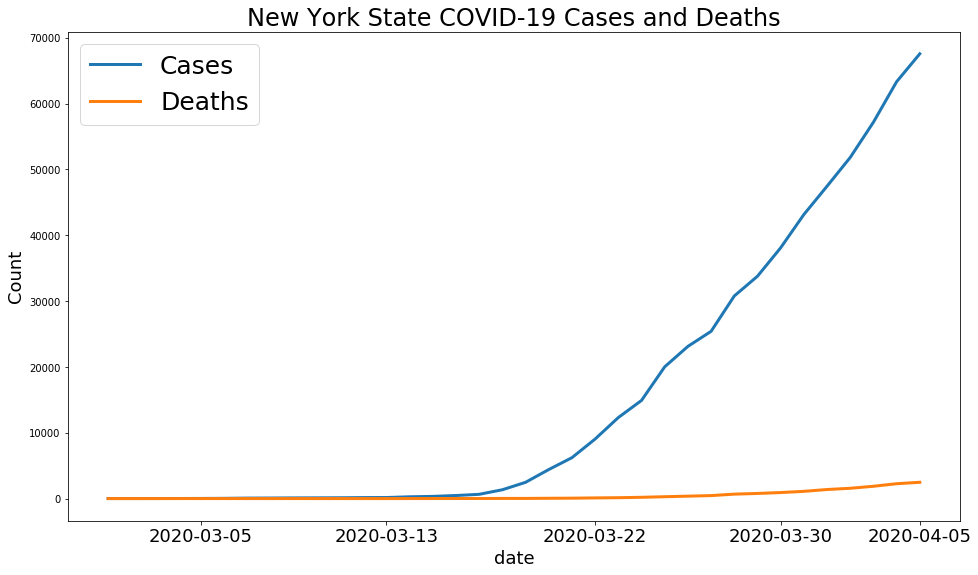

In [34]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

plt.plot(ny_cd.index, # X variable
         ny_cd['cases'], # Y variable
         label = 'Cases',
         lw = 3)

plt.plot(ny_cd.index, # X variable
         ny_cd['deaths'], # Y variable
         label = 'Deaths',
         lw = 3)

plt.title('New York State COVID-19 Cases and Deaths', fontsize = 24)
plt.xlabel('date', fontsize = 18)
plt.xticks(['2020-03-05', '2020-03-13', '2020-03-22', '2020-03-30', '2020-04-05'], fontsize = 18)
plt.ylabel('Count', fontsize = 18)
plt.legend(fontsize = 25);



